f(x, y) = x^2 + y^2

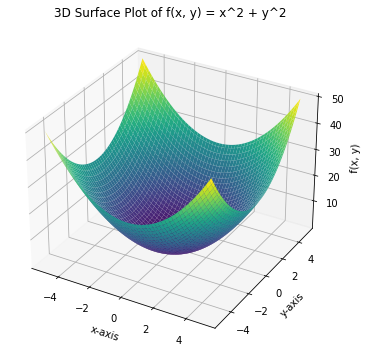

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 정의
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 3D 그래프 그리기
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("3D Surface Plot of f(x, y) = x^2 + y^2")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('f(x, y)')
plt.show()

Contour Plot

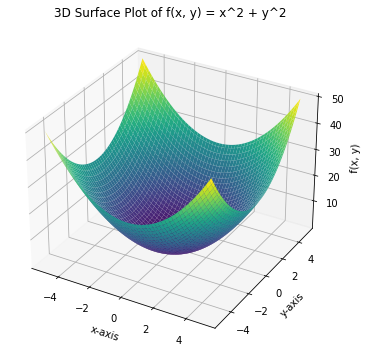

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 정의
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 3D 그래프 그리기
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("3D Surface Plot of f(x, y) = x^2 + y^2")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('f(x, y)')
plt.show()

조합 그래프 (등고선 + 3D 그래프)

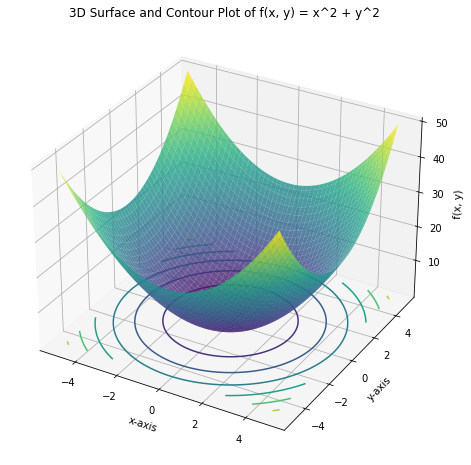

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')
ax.set_title("3D Surface and Contour Plot of f(x, y) = x^2 + y^2")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('f(x, y)')
plt.show()

벡터 필드 (Gradient Field)

- Gradient 벡터 ∇f(x,y)=[2x,2y]를 함께 시각화하여 함수 값이 가장 빠르게 증가하는 방향을 나타낼 수 있습니다.

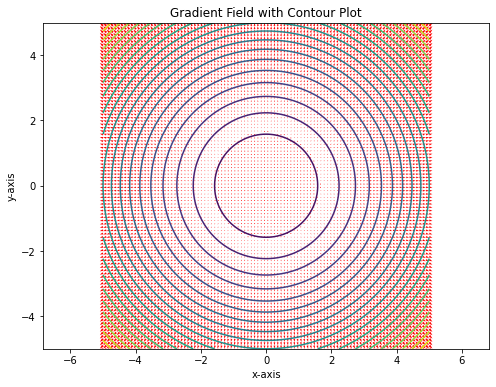

In [4]:
U = 2 * X  # Gradient의 x 성분
V = 2 * Y  # Gradient의 y 성분

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')  # 등고선
plt.quiver(X, Y, U, V, color='red')  # Gradient 벡터 필드
plt.title("Gradient Field with Contour Plot")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axis('equal')
plt.show()


(1,1)에서의 Gradient 벡터를 시각화

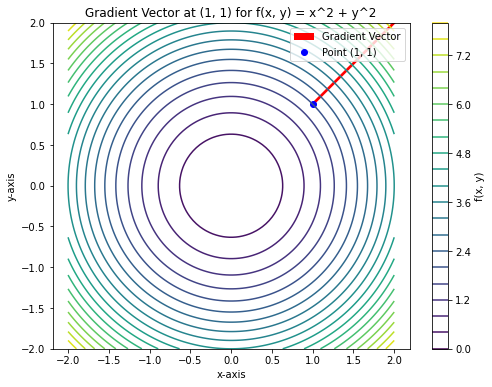

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x, y):
    return x**2 + y**2

# Gradient 벡터 계산
def grad_f(x, y):
    return np.array([2*x, 2*y])

# 등고선 그리기
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Gradient 벡터 계산 (1, 1)에서
point = np.array([1, 1])
grad = grad_f(point[0], point[1])  # [2, 2]

# 그래프 그리기
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='f(x, y)')
plt.quiver(point[0], point[1], grad[0], grad[1], color='red', angles='xy', scale_units='xy', scale=1, label='Gradient Vector')  # 화살표로 Gradient 표시
plt.scatter(point[0], point[1], color='blue', label='Point (1, 1)')  # (1, 1) 위치 표시
plt.title("Gradient Vector at (1, 1) for f(x, y) = x^2 + y^2")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axis('equal')
plt.legend()
plt.show()


Learning rate 0.1로 변경

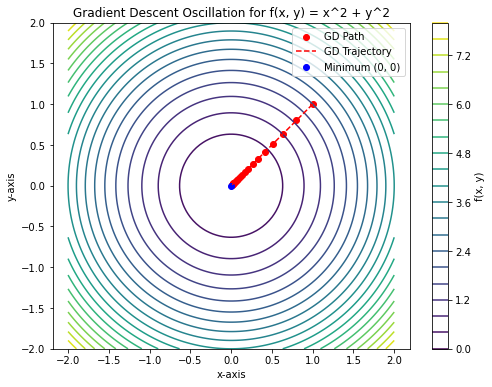

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x, y):
    return x**2 + y**2

# Gradient 계산
def grad_f(x, y):
    return np.array([2*x, 2*y])

# Gradient Descent 구현
def gradient_descent(start, learning_rate, steps):
    path = [start]
    current = start
    for _ in range(steps):
        grad = grad_f(current[0], current[1])  # Gradient 계산
        next_point = current - learning_rate * grad  # Gradient Descent 업데이트
        path.append(next_point)
        current = next_point
    return np.array(path)

# 초기 조건 및 파라미터
start = np.array([1, 1])  # 시작점
learning_rate = 0.1  # 학습률
steps = 20  # Gradient Descent 반복 횟수

# 경로 계산
path = gradient_descent(start, learning_rate, steps)

# 등고선 그리기
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')  # 등고선
plt.colorbar(contour, label='f(x, y)')
plt.scatter(path[:, 0], path[:, 1], color='red', label='GD Path')  # Gradient Descent 경로 점
plt.plot(path[:, 0], path[:, 1], color='red', linestyle='--', label='GD Trajectory')  # 경로 연결선
plt.scatter(0, 0, color='blue', label='Minimum (0, 0)')  # 최소점 표시
plt.title("Gradient Descent Oscillation for f(x, y) = x^2 + y^2")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.axis('equal')
plt.show()